# Load MNIST Datasets

In [6]:
import tensorflow.keras as keras
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

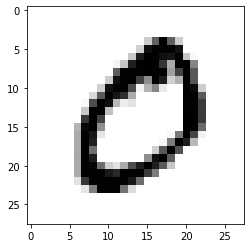

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [8]:
print(y_train[1])

0


# Normalize Dataset

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

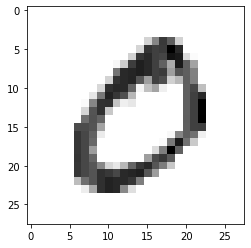

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train[1])

plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

# Create and Train Model

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.softmax))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=4)
history.history.keys()

Epoch 1/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2615 - accuracy: 0.9252
Epoch 2/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1639 - accuracy: 0.9561
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1408 - accuracy: 0.9625
Epoch 4/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1230 - accuracy: 0.9668


dict_keys(['loss', 'accuracy'])

# Plot Loss and Accuracy vs Epochs

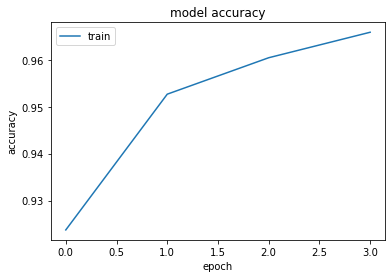

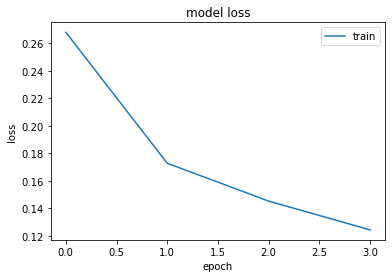

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper right')
plt.show()



# Test Model Loss and Accuracy

In [18]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1707 - accuracy: 0.9596
0.17071716487407684
0.9595999717712402


# Model Predictions

In [19]:
model.save('deep.model')
new_model = tf.keras.models.load_model('deep.model')
predictions = new_model.predict(x_test)
print(predictions)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: deep.model\assets
[[1.6175466e-12 8.7766686e-13 4.9951782e-10 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.7750433e-04 2.8600169e-03 9.6418488e-01 ... 5.8389684e-28
  2.3265994e-27 5.6085165e-28]
 [1.1403340e-22 1.0000000e+00 8.1165249e-16 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [5.9867072e-10 1.2228760e-12 2.0227388e-07 ... 3.5124462e-38
  0.0000000e+00 0.0000000e+00]
 [9.9879355e-11 1.6595767e-19 1.8445101e-13 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.4729194e-11 7.1903104e-19 5.3338427e-12 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [20]:
import numpy as np
pred=predictions[1]
print(np.argmax(pred))

2


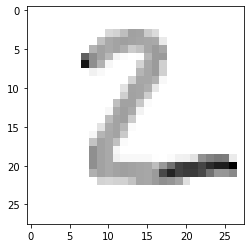

In [23]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()

# Classification Report for F1-score

In [21]:
from sklearn.metrics import classification_report


y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

157/157 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.92      0.97      0.94      1010
           4       0.97      0.95      0.96       982
           5       0.98      0.88      0.93       892
           6       0.97      0.97      0.97       958
           7       0.95      0.98      0.97      1028
           8       0.94      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

